In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist= tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


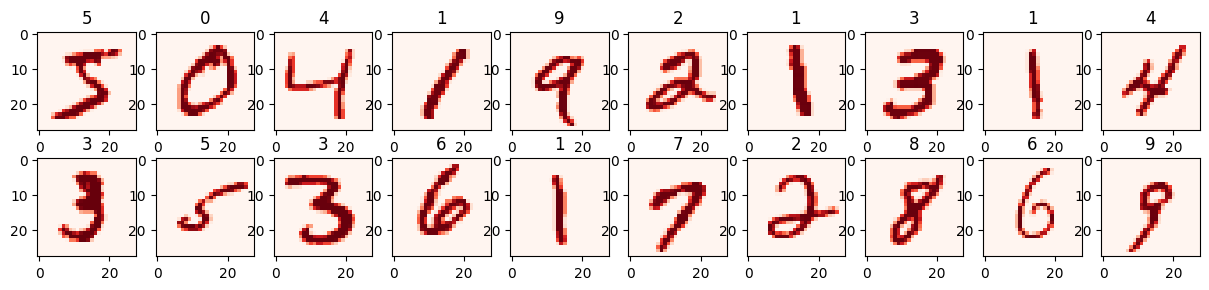

In [5]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

In [6]:
print(x_train.shape)
print(x_train[0])


(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [7]:
xtrain = x_train/255.0
xtest = x_test/255.0

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [11]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2596 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1162 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0791 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0598 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9861


In [12]:
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0370 - accuracy: 0.9882
Epoch 2/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9914
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9934
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0191 - accuracy: 0.9939
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9948
Epoch 6/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 7/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 8/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0106 - accuracy: 0.9968
Epoch 9/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - accuracy: 0.9974


In [13]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 28.4655 - accuracy: 0.9714
[28.465524673461914, 0.9714000225067139]


In [14]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 5.4678 - accuracy: 0.9877 - val_loss: 1.6318 - val_accuracy: 0.9943
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.1455 - accuracy: 0.9942 - val_loss: 3.3878 - val_accuracy: 0.9900
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.0056 - accuracy: 0.9944 - val_loss: 3.4591 - val_accuracy: 0.9905
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.0658 - accuracy: 0.9942 - val_loss: 3.0973 - val_accuracy: 0.9908
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 1.7695 - accuracy: 0.9947 - val_loss: 3.0593 - val_accuracy: 0.9933
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.6577 - accuracy: 0.9950 - val_loss: 2.9452 - val_accuracy: 0.9918
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.8817 - accuracy: 0.9941 - val_loss: 3.7189 - val_accurac

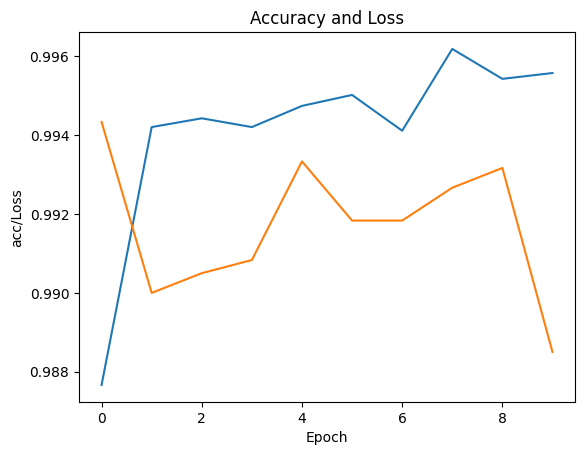

In [15]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

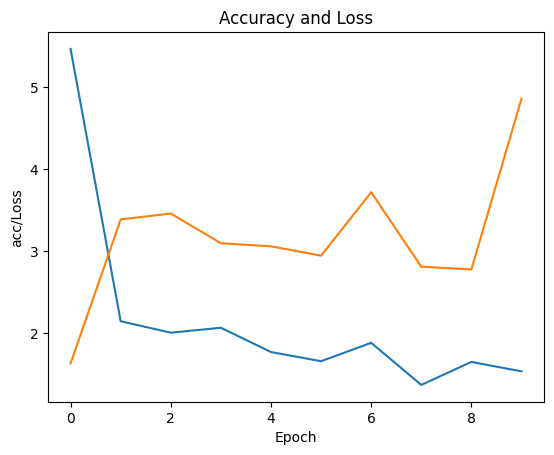

In [16]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

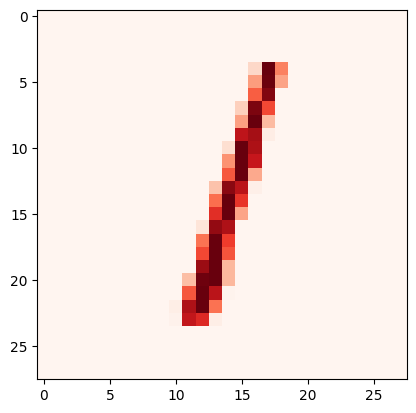

In [27]:
plt.imshow(np.squeeze(x_test[2]),cmap="Reds")

In [28]:
prediction=model.predict(x_test)
print(np.argmax(prediction[2]))

313/313 [==============================] - 1s 2ms/step
1


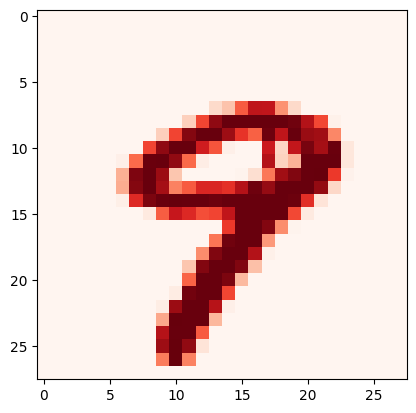

In [30]:
plt.imshow(np.squeeze(x_test[9]),cmap="Reds")

In [29]:
prediction=model.predict(x_test)
print(np.argmax(prediction[9]))

313/313 [==============================] - 1s 2ms/step
9
